**Email spam Detection**

Importing the required Libraries

In [63]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns


Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [61]:
import io
email = pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding='Latin-1')
print(email)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


Dropping the unnecessary columns

In [62]:
email=email.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
email=email.rename(columns={"v1":"label","v2":"text"})
email.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='label', ylabel='count'>

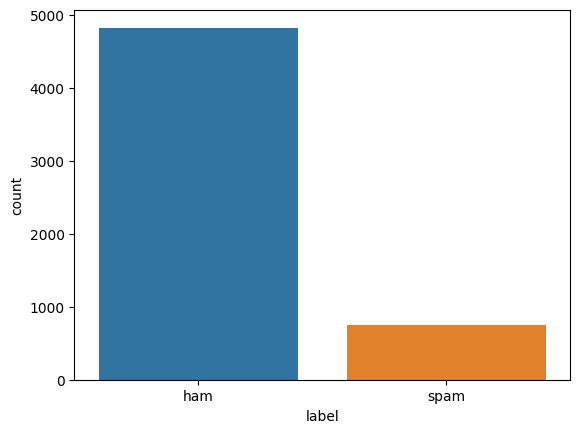

In [64]:
sns.countplot(x=email['label'])

Exploratory Data Analysis

In [65]:
#getting the stats of the data
email.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [66]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [67]:
#checking for null Values
email.isnull().sum()

label    0
text     0
dtype: int64

In [68]:
email['length']=email['text'].apply(len)
email.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [69]:
print(" number of Rows: ", len(email))

 number of Rows:  5572


In [71]:
email.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [72]:
email.loc[:,'label']=email.label.map({'ham':0, 'spam':1})
email.head()

<ipython-input-72-e3b4de27b3a6>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  email.loc[:,'label']=email.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(email['text'])

x_train, x_test, y_train, y_test= train_test_split(text, email['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [75]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


We use Machine Learning Algorithm to train our data

In [76]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [77]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_train, y_train, train_size=0.9,random_state=25)

In [82]:
email= pd.concat([x_train, y_train], axis=1)
# separate minority and majority classes
Spam = email[email.label==0]
Ham = email[email.label==1]

In [83]:
Spam


,text,label
2952,"URGENT! Your mobile was awarded a å£1,500 Bonu...",0
3997,We tried to call you re your reply to our sms ...,0
1627,You have been selected to stay in 1 of 250 top...,0
1349,FREE2DAY sexy St George's Day pic of Jordan!Tx...,0
5378,Free entry to the gr8prizes wkly comp 4 a chan...,0
...,...,...
2943,We currently have a message awaiting your coll...,0
3440,Get a FREE mobile video player FREE movie. To ...,0
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,0
9,Had your mobile 11 months or more? U R entitle...,0


In [84]:
Ham

,text,label
3711,Wat u doing there?,1
3792,Hey are you angry with me. Reply me dr.,1
276,Tell rob to mack his gf in the theater,1
2216,OK i'm waliking ard now... Do u wan me 2 buy a...,1
1050,Are you available for soiree on June 3rd?,1
...,...,...
64,Ok lar i double check wif da hair dresser alre...,1
743,Ok. There may be a free gym about.,1
3876,"Sorry sir, i will call you tomorrow. senthil....",1
4207,Or i go home first lar Ì_ wait 4 me lor.. I pu...,1
